#### Project by: Ugne Vaisvilaite and Ieva Zarina

# Web Scraping & Data Analysis
## Table of contents

1. [Introduction](#Introduction)
    - [Required libraries](#Required-libraries)

2. [Step 1: Web scraping](#Step-1:-Web-scraping)
    - [Scraping Booking.com](#Scraping-booking.com)
    - [Scraping TripAdvisor.com](#Scraping-TripAdvisor.com)

3. [Step 2: Saving the data](#Step-2:-Saving-the-data)

4. [Step 3: Data analysis](#Step-3:-Data-analysis)
5. [Step 4: Plotting the data](#Step-4:-Plotting-the-data)



## Introduction
[[ go back to the top ]](#Table-of-contents)
 
This is the final She Goes Tech training course project. The project consists of web scraping and data analysis parts. Data was scrapped from Booking.com and TripAdvisor.com travel accommodation sites. The main target was to analyze which site offers the cheapest one-night stays and price and rating ratio.ratio.

## Required libraries
[[ go back to the top ]](#Table-of-contents)

This notebook uses several Python packages that come standard with the Python distribution. The primary libraries that we'll be using are:

* **Selenium**: This package is used to automate web browser interaction from Python.
* **BeautifulSoup**: Beautiful Soup helps you pull particular content from a webpage, remove the HTML markup, and save the information.
* **pandas**: Provides a DataFrame structure to store data in memory and work with it easily and efficiently.
* **sqlite3**: Database interface that allows connections to various SQLite database engines.
* **Matplotlib**: A comprehensive library for creating static, animated, and interactive visualizations.
* **Seaborn**: Data visualization library that provides a high-level interface for drawing attractive and informative statistical graphics.

In [5]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1: Web scraping

[[ go back to the top ]](#Table-of-contents)

Selenium was used as page loader and Beautiful Soup for fetching the data. Because pages have pretty different parameters and layout structures.

### Scraping Booking.com

[[ go back to the top ]](#Table-of-contents)

> After creating an object of Webdriver, we can open a webpage and perform various actions such as opening window, filling search bar, clicking tabs, etc.

In [99]:
browser=webdriver.Chrome()

#load Booking.com page
browser.get('https://www.booking.com')
assert 'Booking.com' in browser.title 

In [100]:
#Click accept button
accept = browser.find_element(By.ID, "onetrust-accept-btn-handler")
accept.click()

In [101]:
#Enter destination
search_box = browser.find_element(By.NAME, 'ss')
search_box.send_keys('London' + Keys.RETURN)

In [102]:
#If needed remove Genius advertisements
genius_element = browser.find_element(By.CSS_SELECTOR, '[aria-label="Dismiss sign in information."]')
genius_element.click()

In [103]:
#Press calendar button to enter check in date (without check out date system automatically sets one night stay)
calendar_button = browser.find_element(By.CLASS_NAME, 'd47738b911')
calendar_button.click()


In [106]:
#Move forward/backwards to choose the month of the stay
forward_calendar_page = browser.find_element(By.CLASS_NAME,"be298b15fa")
forward_calendar_page.click()

In [125]:
backward_calendar_page = browser.find_element(By.CLASS_NAME,"ab15620a33")
backward_calendar_page.click()


In [107]:
#Enter check-in date
check_in_date = browser.find_element(By.CSS_SELECTOR, '[data-date="2023-02-09"]')
check_in_date.click()


In [108]:
submit = browser.find_element(By.CSS_SELECTOR, '[type=submit]')
submit.click()

In [109]:
#To avoid "new" accomodations let's set required review scores
number_list=list(range(90, 50, -10))
number_list
for i in number_list:
    review_score = browser.find_element(By.CSS_SELECTOR, f"[data-filters-item='review_score:review_score={i}']")
    review_score.click()

In [110]:
soup = BeautifulSoup(browser.page_source, 'lxml')

In [111]:
hotels_booking = []
for name in soup.findAll('div',{'data-testid':'title'}):
  hotels_booking.append(name.text.strip())
hotels_booking[:5]
len(hotels_booking)

25

In [112]:
ratings_booking = []
for rating in soup.findAll('div',{'class':'d10a6220b4'}):
      ratings_booking.append(rating.text.strip())
len(ratings_booking)

25

In [113]:
reviews_booking = []
for review in soup.findAll('div',{'class':'db63693c62'}):
  reviews_booking.append(review.text.replace('reviews','').replace(',','').strip())
reviews_booking[:5]
len(reviews_booking)

25

In [114]:
price_booking = []
for p in soup.findAll('span',{'class':['fbd1d3018c', 'bd73d13072']}):
  price_booking.append(p.text.replace('€','').replace(',','').strip()) 
price_booking[:5]
len(price_booking)

25

### Scraping TripAdvisor.com:

[[ go back to the top ]](#Table-of-contents)

In [89]:
browser=webdriver.Chrome()
browser.get('https://www.tripadvisor.com/Hotels-g186338-a_ufe.true-London_England-Hotels.html')


In [90]:
#Click accept button
accept = browser.find_element(By.ID, "onetrust-accept-btn-handler")
accept.click()

In [91]:
soup = BeautifulSoup(browser.page_source, 'lxml')

In [92]:
list_of_numbers = str(list(range(1, 101)))
hotels_tripadvisor = []
for name in soup.findAll('a',{'data-clicksource':'HotelName'}):
      hotels_tripadvisor.append(name.text.strip(list_of_numbers + '.'))
hotels_tripadvisor[:5]


['YOTEL London Shoreditch',
 'Cove - Arne Street, Covent Garden',
 'Four Seasons Hotel London at Ten Trinity Square',
 'Threadneedles, Autograph Collection',
 'Premier Inn London Tower Bridge hotel']

In [93]:
ratings_tripadvisor = []
for rating in soup.findAll('a',{'class':'ui_bubble_rating'}):
      if rating['alt'] == "5 of 5 bubbles":
            rating = 10
      elif rating['alt'] == "4.5 of 5 bubbles":
            rating = 9
      elif rating['alt'] == "4 of 5 bubbles":
            rating = 8
      elif rating['alt'] == "3.5 of 5 bubbles":
            rating = 7
      elif rating['alt'] == "3 of 5 bubbles":
            rating = 6
      else:
            rating = 5
      ratings_tripadvisor.append(rating)
len(ratings_tripadvisor)

33

In [94]:
reviews_tripadvisor = []
for review in soup.findAll('a',{'class':'review_count'}):
  reviews_tripadvisor.append(review.text.replace('reviews','').replace(',','').strip())
len(reviews_tripadvisor)

33

In [95]:
price_tripadvisor = []
for p in soup.findAll('div',{'data-sizegroup':'mini-meta-price'}):
  price_tripadvisor.append(p.text.replace('€','').replace(',','').strip()) 
price_tripadvisor[:5]
len(price_tripadvisor)

33

## Step 2: Saving the data

[[ go back to the top ]](#Table-of-contents)

> After retrieving all the required data from the Booking.com and TripAdvisor.com web pages, the data was saved to dataframe using pandas.

In [115]:
df1 = {'Hotel':hotels_booking,'Ratings':ratings_booking,'No_of_Reviews':reviews_booking,'Price, €':price_booking}
df_booking = pd.DataFrame.from_dict(df1)

In [116]:
df_booking[:10]

,Hotel,Ratings,No_of_Reviews,"Price, €"
0,Mornington Hotel London Victoria,7.6,1221,126
1,Yotel London Shoreditch,7.8,1800,132
2,Royal Lancaster London,9.1,3742,355
3,The Landmark London,8.9,3218,412
4,Nobu Hotel London Portman Square,8.5,883,519
5,The Montcalm At Brewery London City,6.8,2997,180
6,One Hundred Shoreditch,8.6,1661,234
7,"Inhabit, Southwick Street",8.0,3475,208
8,Montcalm Royal London House-City of London,8.3,7950,262
9,White House Hotel,7.1,2065,75


In [ ]:
df_booking.to_csv("bookingcom_london_list.csv")

In [96]:
df2 = {'Hotel':hotels_tripadvisor,'Ratings':ratings_tripadvisor,'No_of_Reviews':reviews_tripadvisor,'Price, €':price_tripadvisor}
df_tripadvisor = pd.DataFrame.from_dict(df2)

In [98]:
df_tripadvisor[:10]

,Hotel,Ratings,No_of_Reviews,"Price, €"
0,YOTEL London Shoreditch,9,692,198
1,"Cove - Arne Street, Covent Garden",9,60,246
2,Four Seasons Hotel London at Ten Trinity Square,10,643,847
3,"Threadneedles, Autograph Collection",9,1405,432
4,Premier Inn London Tower Bridge hotel,9,4252,98
5,The Westbridge Hotel,9,2156,188
6,The Waldorf Hilton London,8,5957,315
7,The Bentley London,8,1070,230
8,Montana Hotel,8,1251,179
9,The Lion & Key Hotel,9,342,94


In [ ]:
df_tripadvisor.to_csv("tripadvisor_london_list.csv")

## Step 3: Data analysis

[[ go back to the top ]](#Table-of-contents)

> After having data saved to dataframe in rows and columns, let's do some analysis.

In [4]:
conn = sqlite3.connect('my_data.db')
c = conn.cursor() #is it needed

In [5]:
booking = pd.read_csv('bookingcom_london_list.csv')
booking.head()

,Unnamed: 0,Hotel,Ratings,No_of_Reviews,"Price, €"
0,0,Fitzrovia Hotel,7.8,2624,221
1,1,ApartaSuites Emerald,8.2,4,171
2,2,The Windmill On The Common,8.5,767,146
3,3,The Kings Arms,9.4,612,204
4,4,The Tommyfield Hotel,8.6,483,135


In [6]:
tripadvisor = pd.read_csv('tripadvisor_london_list.csv')
tripadvisor.head()

,Unnamed: 0,Hotel,Ratings,No_of_Reviews,"Price, €"
0,0,YOTEL London Shoreditch,9,685,112
1,1,The Montcalm Royal London House,10,3354,207
2,2,Park Grand London Hyde Park,8,3362,166
3,3,The Resident Covent Garden,10,1244,302
4,4,Park Grand Paddington Court,9,3212,145


In [7]:
tripadvisor.to_sql('tripadvisor', conn, if_exists='append', index = False)# is it needed?

34

In [8]:
booking.to_sql('booking_com', conn, if_exists='append', index = False) # is it needed?

25

In [9]:
booking.rename(columns = {'Unnamed: 0':'Popularity'}, inplace = True)
booking['Popularity'] = booking['Popularity'] + 1
booking['Website'] = 'Booking'
booking.head()

,Popularity,Hotel,Ratings,No_of_Reviews,"Price, €",Website
0,1,Fitzrovia Hotel,7.8,2624,221,Booking
1,2,ApartaSuites Emerald,8.2,4,171,Booking
2,3,The Windmill On The Common,8.5,767,146,Booking
3,4,The Kings Arms,9.4,612,204,Booking
4,5,The Tommyfield Hotel,8.6,483,135,Booking


In [10]:
tripadvisor.rename(columns = {'Unnamed: 0':'Popularity'}, inplace = True)
tripadvisor['Popularity'] = tripadvisor['Popularity'] + 1
tripadvisor['Website'] = 'Tripadvisor'
tripadvisor.head()

,Popularity,Hotel,Ratings,No_of_Reviews,"Price, €",Website
0,1,YOTEL London Shoreditch,9,685,112,Tripadvisor
1,2,The Montcalm Royal London House,10,3354,207,Tripadvisor
2,3,Park Grand London Hyde Park,8,3362,166,Tripadvisor
3,4,The Resident Covent Garden,10,1244,302,Tripadvisor
4,5,Park Grand Paddington Court,9,3212,145,Tripadvisor


> Making both DataFrames the same size:

In [11]:
booking.shape, tripadvisor.shape

((25, 6), (34, 6))

In [12]:
tripadvisor = tripadvisor.iloc[:len(booking)]
tripadvisor.tail()

,Popularity,Hotel,Ratings,No_of_Reviews,"Price, €",Website
20,21,The Montague on The Gardens,10,5449,347,Tripadvisor
21,22,"The Standard, London",9,495,306,Tripadvisor
22,23,Millennium Gloucester Hotel London Kensington,8,6715,137,Tripadvisor
23,24,The Resident Kensington,9,4753,194,Tripadvisor
24,25,Travelodge London Manor House,9,264,96,Tripadvisor


In [13]:
booking.shape, tripadvisor.shape

((25, 6), (25, 6))

> Concatenating (merging) both DataFrames into one by appending rows:

In [14]:
merged_hotels = pd.concat([booking, tripadvisor])
merged_hotels.head()

,Popularity,Hotel,Ratings,No_of_Reviews,"Price, €",Website
0,1,Fitzrovia Hotel,7.8,2624,221,Booking
1,2,ApartaSuites Emerald,8.2,4,171,Booking
2,3,The Windmill On The Common,8.5,767,146,Booking
3,4,The Kings Arms,9.4,612,204,Booking
4,5,The Tommyfield Hotel,8.6,483,135,Booking


> Checking how many unique hotel names are in the merged DataFrame.
This way we can check whether there are any hotels that are in both websites.

In [15]:
merged_hotels.Hotel.nunique(), merged_hotels.shape

(50, (50, 6))

> Statistics (min, max, mean) of the 'Price €', 'Ratings' and 'No_of_Reviews' columns:

In [16]:
pd.set_option('display.float_format', '{:,.2f}'.format)
summary_table = merged_hotels.groupby(['Website'])['Price, €', 'Ratings', 'No_of_Reviews'].agg(['min', 'max', 'mean'])
summary_table

C:\Users\ievaz\AppData\Local\Temp\ipykernel_25136\2906276633.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  summary_table = merged_hotels.groupby(['Website'])['Price, €', 'Ratings', 'No_of_Reviews'].agg(['min', 'max', 'mean'])


Price, €             Ratings            No_of_Reviews         \
                 min  max   mean     min   max mean           min    max   
Website                                                                    
Booking           79  221 137.32    6.20  9.40 7.73             4   2624   
Tripadvisor       59  930 236.72    6.00 10.00 8.76           173  23721   

                      
                mean  
Website               
Booking       757.88  
Tripadvisor 4,135.44

## Step 4: Plotting the data

[[ go back to the top ]](#Table-of-contents)

> First, plotting pairwise relationships in the dataset to get a general idea:

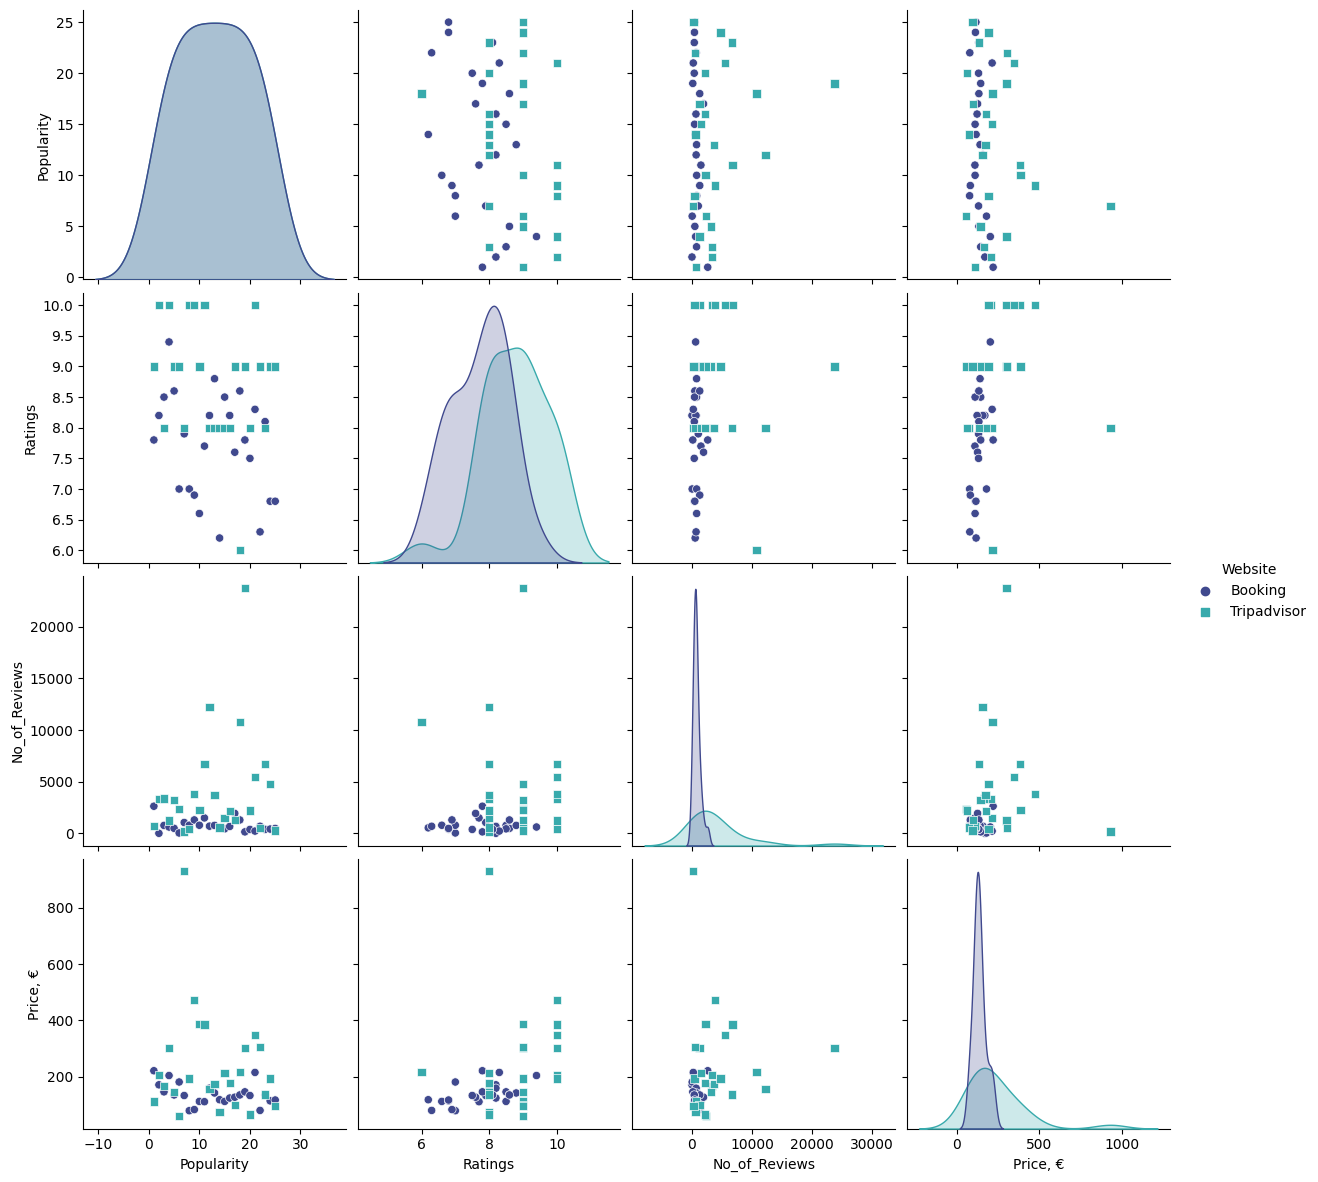

In [17]:
sns.pairplot(merged_hotels, hue='Website', height=3, palette='mako', markers=['o', 's'])

> Comparing Price vs Popularity:

[Text(0.5, 1.0, 'Price depending on popularity')]

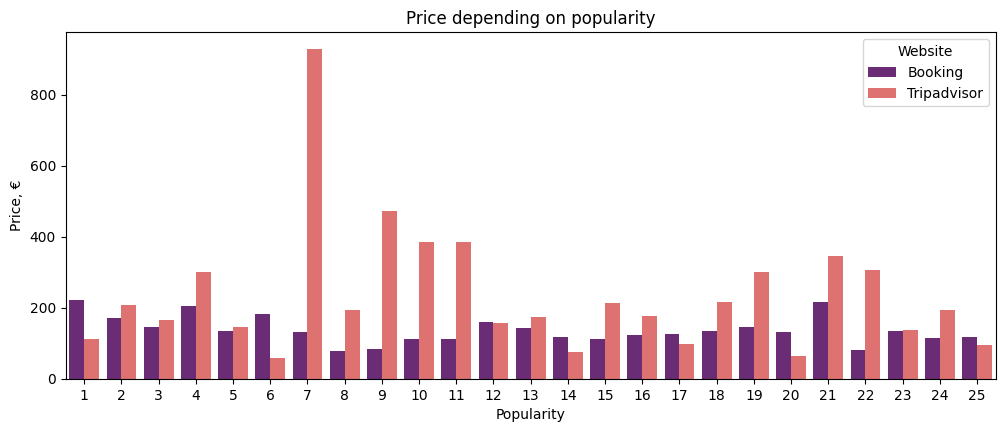

In [18]:
fig, ax = plt.subplots(figsize=(12, 4.5))
sns.barplot(data=merged_hotels, x='Popularity', y='Price, €', hue='Website', ax=ax, palette='magma')
ax.set(title='Price depending on popularity')

> Comparing Price vs Ratings:

[Text(0.5, 1.0, 'Relation between prices and ratings')]

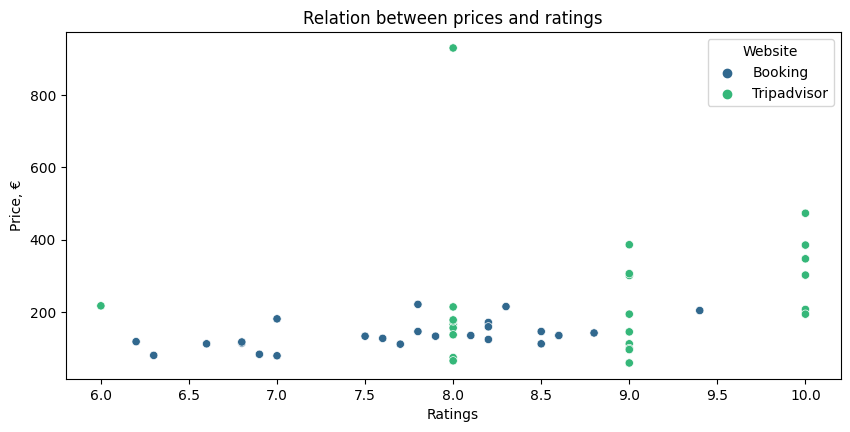

In [19]:
fig, ax = plt.subplots(figsize=(10, 4.5))
sns.scatterplot(data=merged_hotels, x='Ratings', y='Price, €', hue='Website', palette='viridis')
ax.set(title='Relation between prices and ratings')

> Overall 10 cheapest hotels from both websites:

In [20]:
best_price = merged_hotels.sort_values(by=['Price, €', 'Ratings'], ignore_index=True).iloc[:10]
best_price

,Popularity,Hotel,Ratings,No_of_Reviews,"Price, €",Website
0,6,Travelodge London City hotel,9.00,2378,59,Tripadvisor
1,20,Travelodge London Central City Road,8.00,2198,65,Tripadvisor
2,14,Travelodge London Docklands Central,8.00,576,74,Tripadvisor
3,8,Haven Hotel,7.00,784,79,Booking
4,22,Tony's House Hotel,6.30,684,80,Booking
5,9,Assaha Hyde Park Apartments,6.90,1298,83,Booking
6,25,Travelodge London Manor House,9.00,264,96,Tripadvisor
7,17,Holiday Inn London - West,9.00,1281,99,Tripadvisor
8,11,Chelsea House Hotel - B&B,7.70,1492,111,Booking
9,10,The Tudor Inn Hotel,6.60,783,112,Booking


[Text(0, 0, 'Travelodge London City hotel'),
 Text(1, 0, 'Travelodge London Central City Road'),
 Text(2, 0, 'Travelodge London Docklands Central'),
 Text(3, 0, 'Haven Hotel'),
 Text(4, 0, "Tony's House Hotel"),
 Text(5, 0, 'Assaha Hyde Park Apartments'),
 Text(6, 0, 'Travelodge London Manor House'),
 Text(7, 0, 'Holiday Inn London - West'),
 Text(8, 0, 'Chelsea House Hotel - B&B'),
 Text(9, 0, 'The Tudor Inn Hotel')]

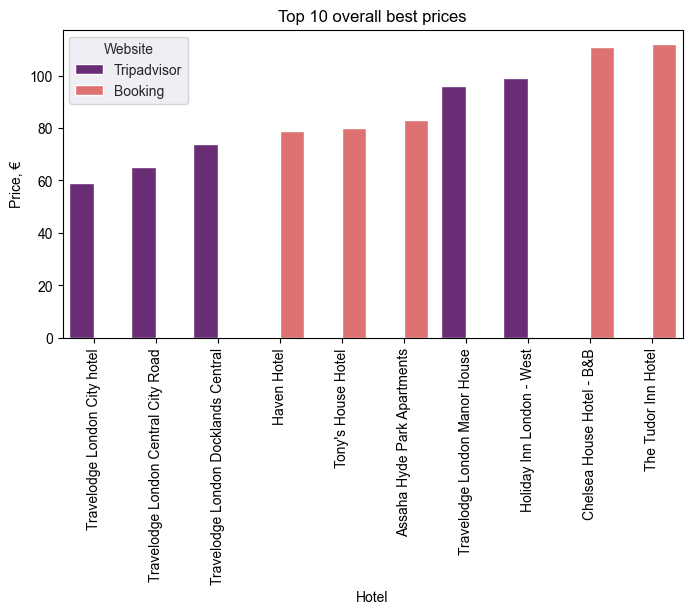

In [21]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.set_style('darkgrid')
sns.barplot(data=best_price, x='Hotel', y='Price, €', hue='Website', ax=ax, palette='magma')
ax.set(title='Top 10 overall best prices')
ax.set_xticklabels(labels=best_price['Hotel'], rotation=90)